There we go

In [30]:
def clean_html(html):
    """
    Remove HTML markup from the given string.

    :param html: the HTML string to be cleaned
    :type html: str
    :rtype: str
    """

    # First we remove inline JavaScript/CSS:
    cleaned = re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", html.strip())
    # Then we remove html comments. This has to be done before removing regular
    # tags since comments can contain '>' characters.
    cleaned = re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
    # Next we can remove the remaining tags:
    cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)
    # Finally, we deal with whitespace
    cleaned = re.sub(r"&nbsp;", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = cleaned.replace("\n","")
    return cleaned.strip() 

In [22]:
import pandas as pd
import numpy as np
import re

In [34]:
#Reading the csv File 
la = pd.read_csv('fulltimeLA.csv')
la.head()

,position,company,description,numreview,location
0,Institutional Review Board Analyst I - Office ...,USC,"<span id=""job_summary"" class=""summary""><div><p...",545 reviews,"Los Angeles, CA"
1,Analyst - Optimization,The Boston Consulting Group,"<span id=""job_summary"" class=""summary""><div><b...",198 reviews,"Los Angeles, CA"
2,Postdoctoral Research Associate,USC,"<span id=""job_summary"" class=""summary""><div><p...",545 reviews,"Los Angeles, CA"
3,Research Analyst,"SHIELDS for Families, Inc.","<span id=""job_summary"" class=""summary""><b>SUMM...",48 reviews,"Los Angeles, CA 90002"
4,Additive Materials and Process Scientist,Divergent 3D,"<span id=""job_summary"" class=""summary""><div><d...",NaN,"Los Angeles, CA"


In [36]:
#Creating a column with the descriptions without HTML tags, nor line breaks
la['clean_descr'] = [clean_html(x) for x in la['description']]


In [39]:
la.head()

,position,company,description,numreview,location,clean_descr
0,Institutional Review Board Analyst I - Office ...,USC,"<span id=""job_summary"" class=""summary""><div><p...",545 reviews,"Los Angeles, CA",Please Note: This position is located on our H...
1,Analyst - Optimization,The Boston Consulting Group,"<span id=""job_summary"" class=""summary""><div><b...",198 reviews,"Los Angeles, CA",PRACTICE AREA: BCG's Advanced Analytics Group...
2,Postdoctoral Research Associate,USC,"<span id=""job_summary"" class=""summary""><div><p...",545 reviews,"Los Angeles, CA",Environment and background Our focus at the La...
3,Research Analyst,"SHIELDS for Families, Inc.","<span id=""job_summary"" class=""summary""><b>SUMM...",48 reviews,"Los Angeles, CA 90002","SUMMARY OF DUTIES: Developing, administering, ..."
4,Additive Materials and Process Scientist,Divergent 3D,"<span id=""job_summary"" class=""summary""><div><d...",NaN,"Los Angeles, CA",Position Specification: Additive Material and ...


In [102]:
stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

from collections import Counter
allwords=[]
for desc in la['clean_descr']:
    for wrd in desc.split():
        if wrd.lower() not in stop:
            allwords.append(wrd.lower())
allwords = Counter(allwords)
allwords

Counter({'please': 69,
         'note:': 11,
         'position': 124,
         'located': 16,
         'health': 100,
         'science': 146,
         'campus.': 1,
         'office': 64,
         'research': 622,
         'implementing': 29,
         'university': 44,
         'southern': 22,
         'california’s': 3,
         'strategic': 61,
         'plan': 43,
         'building': 103,
         'interdisciplinary': 7,
         'collaborations': 8,
         'address': 39,
         'societal': 2,
         'needs': 74,
         'increasing': 19,
         'impact': 64,
         'prominence': 1,
         'research.': 30,
         'invests': 2,
         'initiatives,': 5,
         'promotes': 5,
         'among': 14,
         'sponsors,': 1,
         'provides': 40,
         'services': 138,
         'ensure': 101,
         'usc': 35,
         'achieves': 1,
         'highest': 21,
         'ethical': 3,
         'standards': 39,
         'reporting': 77,
         'senior': 73,
    

<AxesSubplot:>

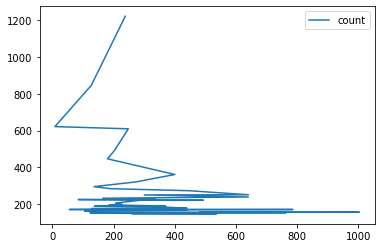

In [107]:
allwords_data = pd.DataFrame.from_dict(allwords, orient='index').reset_index()
allwords_data.columns = ['word','count']
allwords_data = allwords_data.sort_values(by=['count'], ascending= False)
allwords_data.head()

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

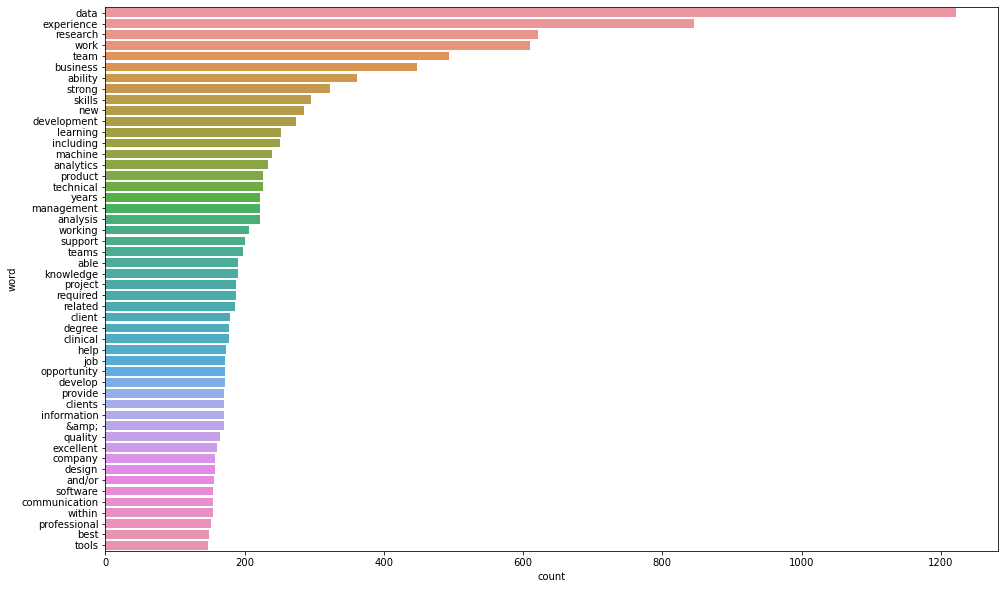

In [129]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(y="word",x='count', data=allwords_data[:50])